<a href="https://colab.research.google.com/github/ramonferrari/mpgc_ti/blob/main/DAV_S2023_C%C3%B3digos_Pr%C3%A9_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis & Visualization
## Professores Eduardo Francisco e Plínio Júnior
#### Grupo:
1. Felipe Nunes Barroso
2. Lucas Felipe Ballesteros Martins
3. Ramon Moreno Ferrari
4. Vagner Almeida Lima




### Preparação: instala e carrega pacotes necessários

In [1]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("showtext")
install.packages("reshape")
install.packages("writexl")
install.packages("corrplot")
install.packages("caret")
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’



In [2]:
suppressWarnings(suppressMessages(library(ggplot2)))
suppressWarnings(suppressMessages(library(showtext)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(reshape)))
suppressWarnings(suppressMessages(library(writexl)))
suppressWarnings(suppressMessages(library(corrplot)))
suppressWarnings(suppressMessages(library(caret)))
suppressWarnings(suppressMessages(library(randomForest)))

In [3]:
# Fonte bonita para gráficos
font_add_google("Merriweather Sans", "merri")

## Exploração da base



In [4]:
# Endereço do arquivo na nuvem, para funcionar para todos os colegas, em qualquer computador
url_dataset <- c("https://raw.githubusercontent.com/ramonferrari/mpgc_ti/main/sustainable_development_report_2023.csv")
# Leitura dos dados
df <- read.table(url_dataset,header=TRUE,sep=",")

In [5]:
head(df)
summary(df)
tail(df)

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,⋯,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FIN,Finland,OECD,86.76059,99.5750,60.88675,95.38638,97.16933,92.11125,94.3276,⋯,86.78900,95.99571,98.4685,91.23375,60.05957,68.79367,87.92800,85.0700,92.52109,75.60100
2,SWE,Sweden,OECD,85.98140,98.8885,63.07413,96.90400,99.76167,91.44025,95.0576,⋯,84.96643,97.58629,94.9650,90.38925,56.83057,70.03100,69.34867,80.1882,88.50845,85.77025
3,DNK,Denmark,OECD,85.68364,99.2155,71.02525,95.39850,99.33967,86.99800,90.7316,⋯,87.56243,96.98486,98.1560,93.03850,44.57171,60.78067,76.30333,92.7924,93.84491,82.14800
4,DEU,Germany,OECD,83.35845,99.5105,72.36600,93.03936,97.16267,81.92025,88.4434,⋯,86.96729,95.78843,88.1470,90.09650,55.41286,64.00200,73.99600,79.2318,89.45755,84.39025
5,AUT,Austria,OECD,82.28019,99.4510,73.06750,92.46800,97.91433,84.57925,92.1636,⋯,83.27414,96.98214,94.6345,92.47367,49.62329,57.33200,NA,73.5836,87.91145,71.13025
6,FRA,France,OECD,82.04834,99.7285,72.39012,93.22457,99.63000,87.82325,89.2696,⋯,85.30600,92.77586,87.4735,90.52950,60.51543,73.83467,65.67750,68.8246,76.09173,73.11150


 country_code         country             region          overall_score  
 Length:166         Length:166         Length:166         Min.   :38.68  
 Class :character   Class :character   Class :character   1st Qu.:60.55  
 Mode  :character   Mode  :character   Mode  :character   Median :69.38  
                                                          Mean   :67.55  
                                                          3rd Qu.:74.95  
                                                          Max.   :86.76  
                                                                         
  goal_1_score     goal_2_score    goal_3_score    goal_4_score   
 Min.   :  0.00   Min.   :19.81   Min.   :12.95   Min.   : 1.232  
 1st Qu.: 55.78   1st Qu.:54.01   1st Qu.:51.86   1st Qu.:61.418  
 Median : 93.30   Median :61.03   Median :75.44   Median :84.773  
 Mean   : 75.23   Mean   :59.80   Mean   :69.69   Mean   :76.513  
 3rd Qu.: 98.95   3rd Qu.:67.26   3rd Qu.:85.52   3rd Qu.:95.644  
 Max. 

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,⋯,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
161,NER,Niger,Sub-Saharan Africa,48.30976,12.8375,45.26114,37.60586,3.02800,43.66275,43.3068,⋯,67.57971,11.280429,63.1655,46.18450,96.21283,99.49233,NA,73.7910,48.96873,51.65175
162,SOM,Somalia,Sub-Saharan Africa,48.02723,11.2740,27.30683,17.86092,55.63900,25.86100,49.3006,⋯,55.66950,5.599857,73.8030,69.41767,94.12900,99.92533,50.25120,53.3714,40.01220,43.72567
163,YEM,"Yemen, Rep.",MENA,46.84698,4.5525,28.76971,44.46743,41.76675,13.05475,36.2314,⋯,53.23780,14.223714,66.2925,52.95275,95.95914,98.66700,74.93667,48.3705,35.90571,50.09433
164,TCD,Chad,Sub-Saharan Africa,45.34232,25.4270,38.53471,27.06107,13.30775,30.83550,42.4036,⋯,64.42433,9.631571,63.0405,32.82225,90.99417,99.07900,NA,76.1944,29.43800,52.59400
165,CAF,Central African Republic,Sub-Saharan Africa,40.39584,3.1820,36.46800,12.95271,19.30575,34.20075,40.4204,⋯,53.38233,7.064714,9.5775,21.89867,94.46214,99.46333,NA,89.7172,42.33267,36.51675
166,SSD,South Sudan,Sub-Saharan Africa,38.67609,0.0000,19.80580,23.86171,1.23225,55.98875,41.0406,⋯,50.91700,1.654833,26.6195,13.82625,90.96000,99.40800,NA,74.6870,38.14117,41.62200


In [6]:
df_round <- df %>% mutate(across(where(is.numeric), round, 2))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(where(is.numeric), round, 2)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


In [7]:
head(df_round)
tail(df_round)

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,⋯,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FIN,Finland,OECD,86.76,99.58,60.89,95.39,97.17,92.11,94.33,⋯,86.79,96.00,98.47,91.23,60.06,68.79,87.93,85.07,92.52,75.60
2,SWE,Sweden,OECD,85.98,98.89,63.07,96.90,99.76,91.44,95.06,⋯,84.97,97.59,94.97,90.39,56.83,70.03,69.35,80.19,88.51,85.77
3,DNK,Denmark,OECD,85.68,99.22,71.03,95.40,99.34,87.00,90.73,⋯,87.56,96.98,98.16,93.04,44.57,60.78,76.30,92.79,93.84,82.15
4,DEU,Germany,OECD,83.36,99.51,72.37,93.04,97.16,81.92,88.44,⋯,86.97,95.79,88.15,90.10,55.41,64.00,74.00,79.23,89.46,84.39
5,AUT,Austria,OECD,82.28,99.45,73.07,92.47,97.91,84.58,92.16,⋯,83.27,96.98,94.63,92.47,49.62,57.33,NA,73.58,87.91,71.13
6,FRA,France,OECD,82.05,99.73,72.39,93.22,99.63,87.82,89.27,⋯,85.31,92.78,87.47,90.53,60.52,73.83,65.68,68.82,76.09,73.11


,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,⋯,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
161,NER,Niger,Sub-Saharan Africa,48.31,12.84,45.26,37.61,3.03,43.66,43.31,⋯,67.58,11.28,63.17,46.18,96.21,99.49,NA,73.79,48.97,51.65
162,SOM,Somalia,Sub-Saharan Africa,48.03,11.27,27.31,17.86,55.64,25.86,49.30,⋯,55.67,5.60,73.80,69.42,94.13,99.93,50.25,53.37,40.01,43.73
163,YEM,"Yemen, Rep.",MENA,46.85,4.55,28.77,44.47,41.77,13.05,36.23,⋯,53.24,14.22,66.29,52.95,95.96,98.67,74.94,48.37,35.91,50.09
164,TCD,Chad,Sub-Saharan Africa,45.34,25.43,38.53,27.06,13.31,30.84,42.40,⋯,64.42,9.63,63.04,32.82,90.99,99.08,NA,76.19,29.44,52.59
165,CAF,Central African Republic,Sub-Saharan Africa,40.40,3.18,36.47,12.95,19.31,34.20,40.42,⋯,53.38,7.06,9.58,21.90,94.46,99.46,NA,89.72,42.33,36.52
166,SSD,South Sudan,Sub-Saharan Africa,38.68,0.00,19.81,23.86,1.23,55.99,41.04,⋯,50.92,1.65,26.62,13.83,90.96,99.41,NA,74.69,38.14,41.62


In [8]:
summary(df)

 country_code         country             region          overall_score  
 Length:166         Length:166         Length:166         Min.   :38.68  
 Class :character   Class :character   Class :character   1st Qu.:60.55  
 Mode  :character   Mode  :character   Mode  :character   Median :69.38  
                                                          Mean   :67.55  
                                                          3rd Qu.:74.95  
                                                          Max.   :86.76  
                                                                         
  goal_1_score     goal_2_score    goal_3_score    goal_4_score   
 Min.   :  0.00   Min.   :19.81   Min.   :12.95   Min.   : 1.232  
 1st Qu.: 55.78   1st Qu.:54.01   1st Qu.:51.86   1st Qu.:61.418  
 Median : 93.30   Median :61.03   Median :75.44   Median :84.773  
 Mean   : 75.23   Mean   :59.80   Mean   :69.69   Mean   :76.513  
 3rd Qu.: 98.95   3rd Qu.:67.26   3rd Qu.:85.52   3rd Qu.:95.644  
 Max. 

In [9]:
na.omit(df) %>% summary()

 country_code         country             region          overall_score  
 Length:107         Length:107         Length:107         Min.   :46.85  
 Class :character   Class :character   Class :character   1st Qu.:61.81  
 Mode  :character   Mode  :character   Mode  :character   Median :70.43  
                                                          Mean   :68.64  
                                                          3rd Qu.:76.36  
                                                          Max.   :86.76  
  goal_1_score      goal_2_score    goal_3_score    goal_4_score  
 Min.   :  3.155   Min.   :21.90   Min.   :17.86   Min.   :24.33  
 1st Qu.: 62.917   1st Qu.:54.11   1st Qu.:52.37   1st Qu.:62.63  
 Median : 93.959   Median :61.07   Median :77.65   Median :88.01  
 Mean   : 79.131   Mean   :60.06   Mean   :71.20   Mean   :79.41  
 3rd Qu.: 98.999   3rd Qu.:67.53   3rd Qu.:87.59   3rd Qu.:97.17  
 Max.   :100.000   Max.   :83.40   Max.   :97.12   Max.   :99.76  
  goal_5_scor

In [10]:
# Deixa variáveis com nomes bonitinhos porque temos TOC
names(df)<-c("Código de país","País","Região","Escore geral","Goal01 - Sem pobreza","Goal02 - Zero fome","Goal03 - Saúde e bem estar","Goal04 - Qualidade da educação","Goal05 - Igualdade de gênero","Goal06 - Água limpa e sanitização","Goal07 - Energia limpa e acessível","Goal08 - Trabalho decente e crescimento econômico","Goal09 - Indústria, Inovação e Infraestrutura","Goal10 - Redução de desigualdades","Goal11 - Cidades e comunidades sustentáveis","Goal12 - Consumo e produção responsáveis","Goal13 - Ações climáticas","Goal14 - Vida subaquática","Goal15 - Vida terrestre","Goal16 - Paz, justiça e instituições fortes","Goal17 - Parcerias pelos objetivos")
names(df)

[1] "Código de país"                                   
 [2] "País"                                             
 [3] "Região"                                           
 [4] "Escore geral"                                     
 [5] "Goal01 - Sem pobreza"                             
 [6] "Goal02 - Zero fome"                               
 [7] "Goal03 - Saúde e bem estar"                       
 [8] "Goal04 - Qualidade da educação"                   
 [9] "Goal05 - Igualdade de gênero"                     
[10] "Goal06 - Água limpa e sanitização"                
[11] "Goal07 - Energia limpa e acessível"               
[12] "Goal08 - Trabalho decente e crescimento econômico"
[13] "Goal09 - Indústria, Inovação e Infraestrutura"    
[14] "Goal10 - Redução de desigualdades"                
[15] "Goal11 - Cidades e comunidades sustentáveis"      
[16] "Goal12 - Consumo e produção responsáveis"         
[17] "Goal13 - Ações climáticas"                        
[18] "Goal14 - Vida subaquática"                        
[19] "Goal15 - Vida terrestre"                          
[20] "Goal16 - Paz, justiça e instituições fortes"      
[21] "Goal17 - Parcerias pelos objetivos"

In [11]:
melt_df <- melt(df, id = c("Código de país","País","Região"))
melt_df<-na.omit(melt_df)
head(melt_df)

melt_df$variable <- factor(melt_df$variable, levels=c("Escore geral","Goal01 - Sem pobreza","Goal02 - Zero fome","Goal03 - Saúde e bem estar","Goal04 - Qualidade da educação","Goal05 - Igualdade de gênero","Goal06 - Água limpa e sanitização","Goal07 - Energia limpa e acessível","Goal08 - Trabalho decente e crescimento econômico","Goal09 - Indústria, Inovação e Infraestrutura","Goal10 - Redução de desigualdades","Goal11 - Cidades e comunidades sustentáveis","Goal12 - Consumo e produção responsáveis","Goal13 - Ações climáticas","Goal14 - Vida subaquática","Goal15 - Vida terrestre","Goal16 - Paz, justiça e instituições fortes","Goal17 - Parcerias pelos objetivos"))

,Código de país,País,Região,variable,value
,<chr>,<chr>,<chr>,<fct>,<dbl>
1,FIN,Finland,OECD,Escore geral,86.76059
2,SWE,Sweden,OECD,Escore geral,85.98140
3,DNK,Denmark,OECD,Escore geral,85.68364
4,DEU,Germany,OECD,Escore geral,83.35845
5,AUT,Austria,OECD,Escore geral,82.28019
6,FRA,France,OECD,Escore geral,82.04834


In [12]:
summary(na.omit(df))

 Código de país         País              Região           Escore geral  
 Length:107         Length:107         Length:107         Min.   :46.85  
 Class :character   Class :character   Class :character   1st Qu.:61.81  
 Mode  :character   Mode  :character   Mode  :character   Median :70.43  
                                                          Mean   :68.64  
                                                          3rd Qu.:76.36  
                                                          Max.   :86.76  
 Goal01 - Sem pobreza Goal02 - Zero fome Goal03 - Saúde e bem estar
 Min.   :  3.155      Min.   :21.90      Min.   :17.86             
 1st Qu.: 62.917      1st Qu.:54.11      1st Qu.:52.37             
 Median : 93.959      Median :61.07      Median :77.65             
 Mean   : 79.131      Mean   :60.06      Mean   :71.20             
 3rd Qu.: 98.999      3rd Qu.:67.53      3rd Qu.:87.59             
 Max.   :100.000      Max.   :83.40      Max.   :97.12             
 Goal0

png 
  2

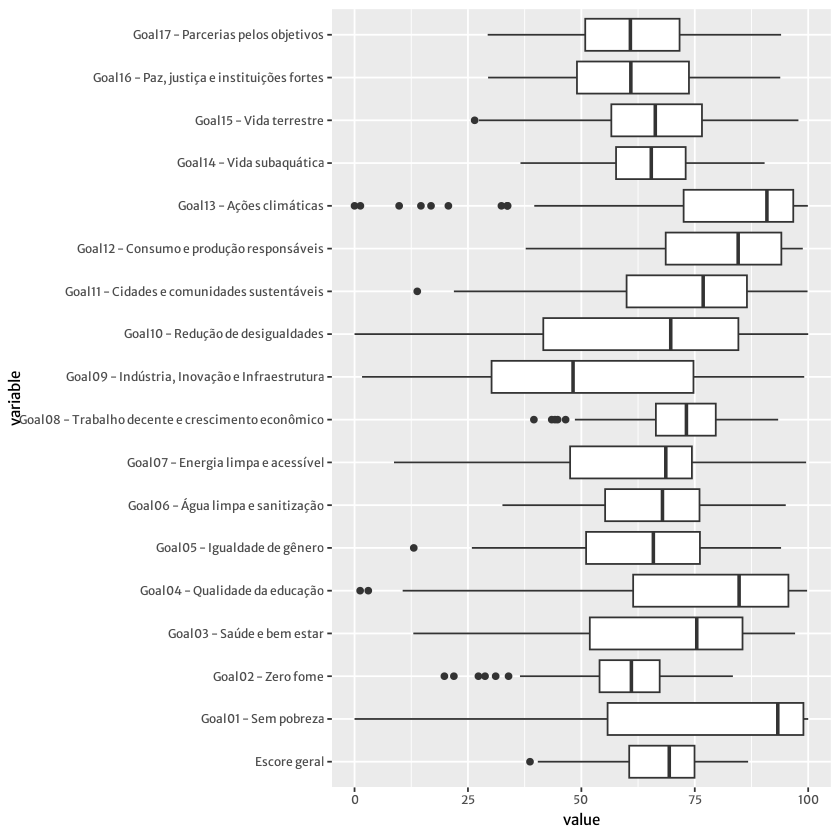

In [13]:
# Mostra o boxplot de todas as variáveis

pdf("boxplot.pdf", width = 13, height = 9)
showtext_auto()
ggplot(melt_df, aes(x = variable, y = value)) +  # ggplot function
    geom_boxplot() +  coord_flip() + theme(plot.title = element_text(size=12),text=element_text(family="merri"))
dev.off()
ggplot(melt_df, aes(x = variable, y = value)) +  # ggplot function
    geom_boxplot() +  coord_flip() + theme(plot.title = element_text(size=12),text=element_text(family="merri"))

In [14]:
# Calcula ainda a média e desvio-padrão
melt_df %>% group_by(variable) %>%  summarise_at(vars(starts_with("val")), list(mean=mean, sd=sd))

variable,mean,sd
<fct>,<dbl>,<dbl>
Escore geral,67.54920,10.29550
Goal01 - Sem pobreza,75.23440,31.16995
Goal02 - Zero fome,59.79910,10.62085
Goal03 - Saúde e bem estar,69.69408,20.35458
Goal04 - Qualidade da educação,76.51297,23.18192
Goal05 - Igualdade de gênero,63.28542,16.39969
Goal06 - Água limpa e sanitização,66.71074,14.09164
Goal07 - Energia limpa e acessível,61.41360,20.36435
Goal08 - Trabalho decente e crescimento econômico,71.95294,10.59231


In [15]:
write_xlsx(df,"dataset_pronto_R.xlsx")
write_xlsx(melt_df,"dataset_pronto_R_melt.xlsx")

In [16]:
names(df)

[1] "Código de país"                                   
 [2] "País"                                             
 [3] "Região"                                           
 [4] "Escore geral"                                     
 [5] "Goal01 - Sem pobreza"                             
 [6] "Goal02 - Zero fome"                               
 [7] "Goal03 - Saúde e bem estar"                       
 [8] "Goal04 - Qualidade da educação"                   
 [9] "Goal05 - Igualdade de gênero"                     
[10] "Goal06 - Água limpa e sanitização"                
[11] "Goal07 - Energia limpa e acessível"               
[12] "Goal08 - Trabalho decente e crescimento econômico"
[13] "Goal09 - Indústria, Inovação e Infraestrutura"    
[14] "Goal10 - Redução de desigualdades"                
[15] "Goal11 - Cidades e comunidades sustentáveis"      
[16] "Goal12 - Consumo e produção responsáveis"         
[17] "Goal13 - Ações climáticas"                        
[18] "Goal14 - Vida subaquática"                        
[19] "Goal15 - Vida terrestre"                          
[20] "Goal16 - Paz, justiça e instituições fortes"      
[21] "Goal17 - Parcerias pelos objetivos"

png 
  2

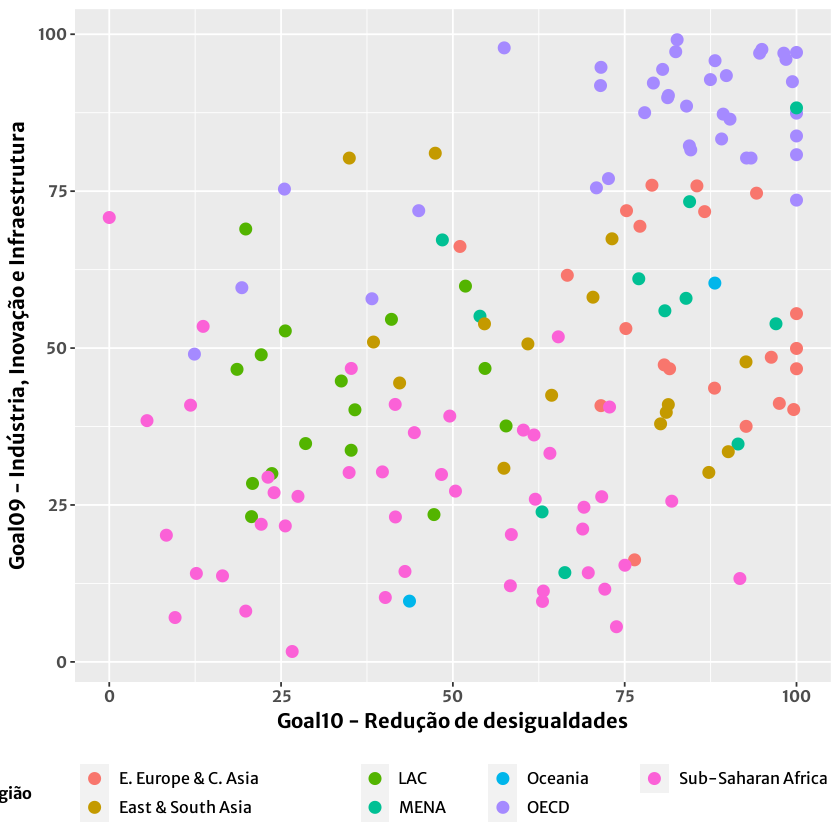

In [17]:
df_na <- df
df_na <- df_na[!is.na(df_na$'Goal10 - Redução de desigualdades'),]
df_na <- df_na[!is.na(df_na$'Goal09 - Indústria, Inovação e Infraestrutura'),]


  ggplot(df_na, aes(x=`Goal10 - Redução de desigualdades`, y=`Goal09 - Indústria, Inovação e Infraestrutura`,colour =`Região`) ) +
  geom_point(shape=19,size=3) +
#  geom_text(label=df_na$`País`,family="merri") +
  theme(legend.position="bottom",plot.title = element_text(size=12),text=element_text(family="merri"))+
  theme(legend.text=element_text(size=12))+
  theme(legend.title=element_text(size=12,face="bold"))+
  theme(axis.title.x=element_text(size=15,face="bold"))+
  theme(axis.title.y=element_text(size=15,face="bold"))+
  theme(axis.text.x=element_text(size=12,face="bold"))+
  theme(axis.text.y=element_text(size=12,face="bold"))

pdf("paises.pdf", width = 10, height = 10)
ggplot(df_na, aes(x=`Goal10 - Redução de desigualdades`, y=`Goal09 - Indústria, Inovação e Infraestrutura`,colour =`Região`) ) +
 geom_point(shape=19,size=3) +
  #geom_text(label=df_na$`País`,family="merri") +
  theme(legend.position="bottom",plot.title = element_text(size=12),text=element_text(family="merri"))+
  theme(legend.text=element_text(size=12))+
  theme(legend.title=element_text(size=12,face="bold"))+
  theme(axis.title.x=element_text(size=15,face="bold"))+
  theme(axis.title.y=element_text(size=15,face="bold"))+
  theme(axis.text.x=element_text(size=12,face="bold"))+
  theme(axis.text.y=element_text(size=12,face="bold"))
dev.off()

png 
  2

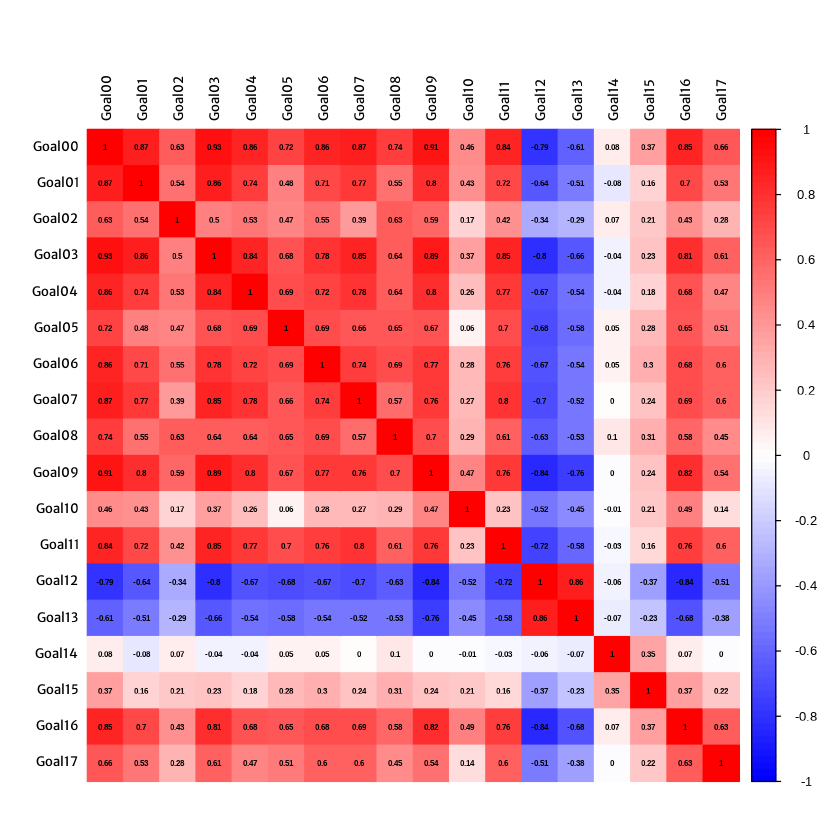

In [18]:
# Cálculo de correlação
# Usamos Pearson a principio
df2<-df[,4:21]
names(df2)[1:18] <- sprintf("Goal%02d", 0:17)

dfcor<- cor(na.omit(df2))

pdf("corr.pdf",width = 7, height = 7)
corrplot(dfcor, method = 'color',tl.col="black",col=colorRampPalette(c("blue","white","red"))(100), order = 'alphabet',family="merri",tl.cex = 0.7,addCoef.col = 'black',number.cex = 0.5)
dev.off()

corrplot(dfcor, method = 'color',tl.col="black",col=colorRampPalette(c("blue","white","red"))(100), order = 'alphabet',family="merri",tl.cex = 0.8,addCoef.col = 'black',number.cex = 0.5)

## Modelagem de dados

In [19]:
names(df)
dim(df)

[1] "Código de país"                                   
 [2] "País"                                             
 [3] "Região"                                           
 [4] "Escore geral"                                     
 [5] "Goal01 - Sem pobreza"                             
 [6] "Goal02 - Zero fome"                               
 [7] "Goal03 - Saúde e bem estar"                       
 [8] "Goal04 - Qualidade da educação"                   
 [9] "Goal05 - Igualdade de gênero"                     
[10] "Goal06 - Água limpa e sanitização"                
[11] "Goal07 - Energia limpa e acessível"               
[12] "Goal08 - Trabalho decente e crescimento econômico"
[13] "Goal09 - Indústria, Inovação e Infraestrutura"    
[14] "Goal10 - Redução de desigualdades"                
[15] "Goal11 - Cidades e comunidades sustentáveis"      
[16] "Goal12 - Consumo e produção responsáveis"         
[17] "Goal13 - Ações climáticas"                        
[18] "Goal14 - Vida subaquática"                        
[19] "Goal15 - Vida terrestre"                          
[20] "Goal16 - Paz, justiça e instituições fortes"      
[21] "Goal17 - Parcerias pelos objetivos"

[1] 166  21

In [20]:
# Exclui variável score (é a média das outras e pode resultar em multicolinearidade)
dfmod<-na.omit(df[,5:21])
dim(dfmod)
names(dfmod)
str(dfmod)
names(dfmod)[1:17] <- sprintf("Goal%02d", 1:17)
names(dfmod)

[1] 107  17

[1] "Goal01 - Sem pobreza"                             
 [2] "Goal02 - Zero fome"                               
 [3] "Goal03 - Saúde e bem estar"                       
 [4] "Goal04 - Qualidade da educação"                   
 [5] "Goal05 - Igualdade de gênero"                     
 [6] "Goal06 - Água limpa e sanitização"                
 [7] "Goal07 - Energia limpa e acessível"               
 [8] "Goal08 - Trabalho decente e crescimento econômico"
 [9] "Goal09 - Indústria, Inovação e Infraestrutura"    
[10] "Goal10 - Redução de desigualdades"                
[11] "Goal11 - Cidades e comunidades sustentáveis"      
[12] "Goal12 - Consumo e produção responsáveis"         
[13] "Goal13 - Ações climáticas"                        
[14] "Goal14 - Vida subaquática"                        
[15] "Goal15 - Vida terrestre"                          
[16] "Goal16 - Paz, justiça e instituições fortes"      
[17] "Goal17 - Parcerias pelos objetivos"

'data.frame':	107 obs. of  17 variables:
 $ Goal01 - Sem pobreza                             : num  99.6 98.9 99.2 99.5 99.7 ...
 $ Goal02 - Zero fome                               : num  60.9 63.1 71 72.4 72.4 ...
 $ Goal03 - Saúde e bem estar                       : num  95.4 96.9 95.4 93 93.2 ...
 $ Goal04 - Qualidade da educação                   : num  97.2 99.8 99.3 97.2 99.6 ...
 $ Goal05 - Igualdade de gênero                     : num  92.1 91.4 87 81.9 87.8 ...
 $ Goal06 - Água limpa e sanitização                : num  94.3 95.1 90.7 88.4 89.3 ...
 $ Goal07 - Energia limpa e acessível               : num  93 98 87.7 77.2 78.6 ...
 $ Goal08 - Trabalho decente e crescimento econômico: num  86.8 85 87.6 87 85.3 ...
 $ Goal09 - Indústria, Inovação e Infraestrutura    : num  96 97.6 97 95.8 92.8 ...
 $ Goal10 - Redução de desigualdades                : num  98.5 95 98.2 88.1 87.5 ...
 $ Goal11 - Cidades e comunidades sustentáveis      : num  91.2 90.4 93 90.1 90.5 ...
 $ Goal12 - C

[1] "Goal01" "Goal02" "Goal03" "Goal04" "Goal05" "Goal06" "Goal07" "Goal08"
 [9] "Goal09" "Goal10" "Goal11" "Goal12" "Goal13" "Goal14" "Goal15" "Goal16"
[17] "Goal17"

In [21]:
set.seed(314)
model1<- lm(Goal09~.,data = dfmod)
summary(model1)
model2<- lm(Goal09~Goal02+Goal03+Goal13+Goal16,data = dfmod)
summary(model2)


Call:
lm(formula = Goal09 ~ ., data = dfmod)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.946  -5.695   0.337   5.320  31.808 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 10.09121   21.12497   0.478  0.63403   
Goal01       0.05458    0.07566   0.721  0.47249   
Goal02       0.41267    0.12814   3.220  0.00178 **
Goal03       0.40646    0.14856   2.736  0.00749 **
Goal04       0.13256    0.09008   1.472  0.14462   
Goal05      -0.03876    0.09999  -0.388  0.69915   
Goal06       0.14477    0.12184   1.188  0.23786   
Goal07       0.05696    0.09962   0.572  0.56890   
Goal08       0.12203    0.14232   0.857  0.39349   
Goal10       0.04726    0.04999   0.945  0.34700   
Goal11      -0.14092    0.11488  -1.227  0.22317   
Goal12      -0.17939    0.18095  -0.991  0.32417   
Goal13      -0.30743    0.10406  -2.954  0.00400 **
Goal14      -0.01206    0.08849  -0.136  0.89193   
Goal15      -0.13023    0.07857  -1.658  0.10089   
Goal16       


Call:
lm(formula = Goal09 ~ Goal02 + Goal03 + Goal13 + Goal16, data = dfmod)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.2461  -5.2267  -0.1337   6.0924  27.6464 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.25314   10.56726  -0.308   0.7588    
Goal02       0.50883    0.09880   5.150 1.27e-06 ***
Goal03       0.65402    0.08278   7.901 3.35e-12 ***
Goal13      -0.40370    0.07035  -5.738 9.87e-08 ***
Goal16       0.24768    0.10090   2.455   0.0158 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.292 on 102 degrees of freedom
Multiple R-squared:  0.8847,	Adjusted R-squared:  0.8801 
F-statistic: 195.6 on 4 and 102 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_smooth()`).”


png 
  2

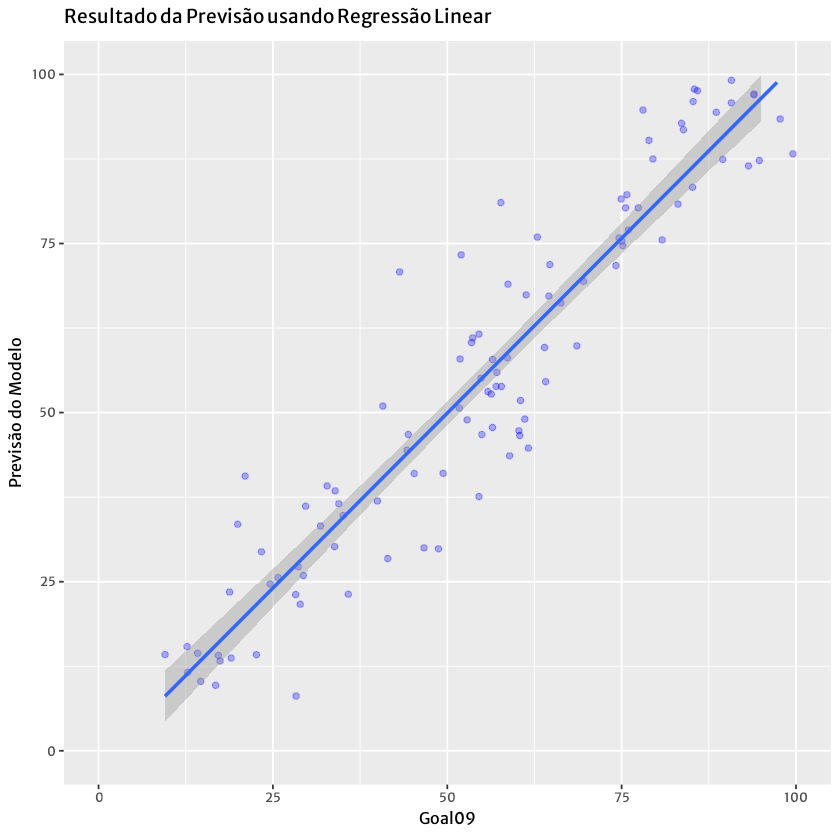

In [22]:
y_Model2 <- predict(model2, dfmod)
dfmod$Model2 <- y_Model2

g2 <- ggplot(dfmod, aes(x=Model2, y=Goal09)) +
  geom_point(alpha=.3,color='blue') +
  geom_smooth(method=lm) +
  ggtitle("Resultado da Previsão usando Regressão Linear")+
  xlab("Goal09") + ylab("Previsão do Modelo")+
  xlim(0,100)+ylim(0,100)+
  theme(axis.title = element_text(family = "merri"),title = element_text(family = "merri",size = 12))+
  theme(text = element_text(size=12,family = "merri"))
g2

pdf("modelo_regressao.pdf", width = 6, height = 6)
g2
dev.off()

In [23]:
#----------ExtrapolacaoArvore----
set.seed(314)
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE, classProbs=TRUE)
model_boosting <- train(Goal09~., data = dfmod, method = "rf",trControl = cv)
model_boosting

Warning message in train.default(x, y, weights = w, ...):
“cannnot compute class probabilities for regression”


Random Forest 

107 samples
 17 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 96, 97, 98, 95, 97, 96, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   2    8.013838  0.9239472  6.446871
   9    7.343532  0.9310558  5.819121
  17    7.586119  0.9301751  5.991805

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 9.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

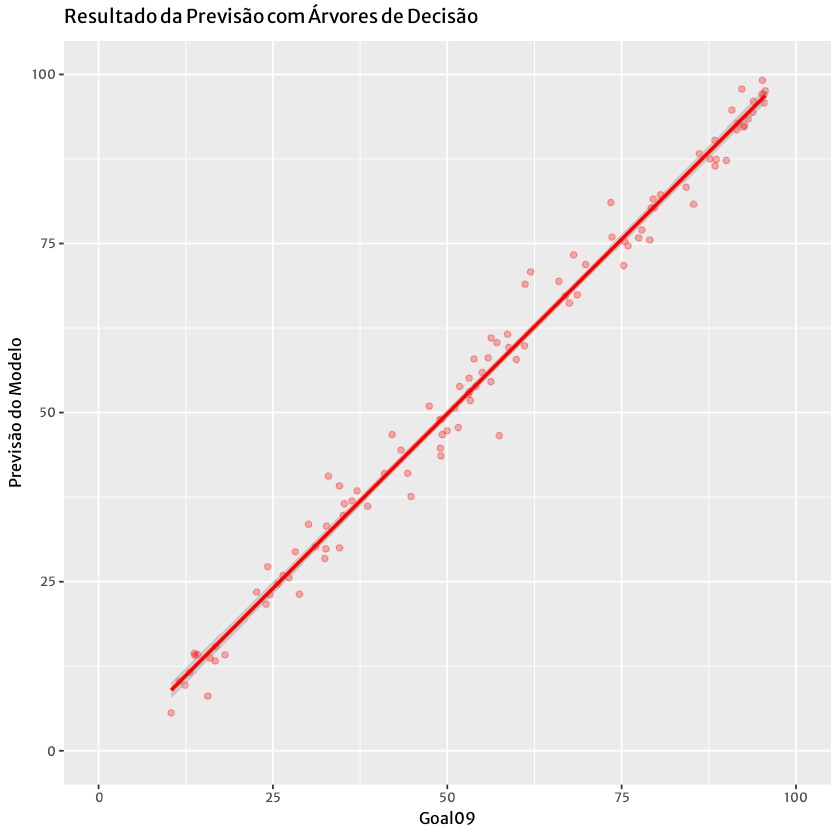

In [24]:
y_Model3 <- predict(model_boosting, dfmod)
dfmod$Model3 <- y_Model3

g2 <- ggplot(dfmod, aes(x=Model3, y=Goal09)) +
  geom_point(alpha=.3,color='red') +
  geom_smooth(method=lm,color="red") +
  ggtitle("Resultado da Previsão com Árvores de Decisão")+
  xlab("Goal09") + ylab("Previsão do Modelo")+
    xlim(0,100)+ylim(0,100)+
  theme(axis.title = element_text(family = "merri"),title = element_text(family = "merri",size = 12))+
  theme(text = element_text(size=12,family = "merri"))
g2

pdf("modelo_arvores.pdf", width = 6, height = 6)
g2
dev.off()